In [69]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Data preprocessing


In [70]:
calories = pd.read_csv('../data/calories.csv')

In [71]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [72]:
activities = pd.read_csv('../data/exercise.csv')

In [73]:
activities.shape

(15000, 8)

In [74]:
activities.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [75]:
# Combining the calories and acitivities
f_activities = pd.concat([activities, calories['Calories']], axis=1)

In [76]:
f_activities.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [77]:
# Filtering only female records
female_activities = f_activities.loc[activities['Gender'] == 'female']

In [78]:
female_activities.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0


In [79]:
female_activities.shape

(7553, 9)

### Creating a dataframe based on the intensity of the activity


In [80]:
female_activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7553 entries, 1 to 14997
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     7553 non-null   int64  
 1   Gender      7553 non-null   object 
 2   Age         7553 non-null   int64  
 3   Height      7553 non-null   float64
 4   Weight      7553 non-null   float64
 5   Duration    7553 non-null   float64
 6   Heart_Rate  7553 non-null   float64
 7   Body_Temp   7553 non-null   float64
 8   Calories    7553 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 590.1+ KB


In [81]:
# list of classified workouts 
'''
    HIIT - High intensity interval training,
    LIIT - Low intensity interval training,
    MIIT - Medium intensity interval training
'''
# create a list of our conditions
def map_activities(rate):
    if rate > 95 and rate <= 105:
        return 'Running or Gym (HIIT)'
    elif rate > 85 and rate <= 95:
        return 'Jogging (MIIT)'
    elif rate > 75 and rate <= 85:
        return 'Walking (LIIT)'
    else:
        return 'Mild acitivity (LIIT)'


female_activities['Activity_Type'] = female_activities['Heart_Rate'].apply(lambda rate: map_activities(rate))

In [82]:
female_activities.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Activity_Type
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,Jogging (MIIT)
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,Running or Gym (HIIT)
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,Walking (LIIT)
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0,Running or Gym (HIIT)
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0,Jogging (MIIT)


### Data cleaning

In [83]:
# Remove unwanted columns
female_activities.drop('User_ID', inplace=True, axis=1)

In [84]:
# checking missing values
female_activities.isnull().sum()

Gender           0
Age              0
Height           0
Weight           0
Duration         0
Heart_Rate       0
Body_Temp        0
Calories         0
Activity_Type    0
dtype: int64

## Data analysis | EDA

In [85]:
female_activities.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000
mean,42.735469,164.405931,63.274460,15.502185,95.408579,40.019833,88.153052
std,16.939220,10.089177,8.449548,8.352013,9.601109,0.784733,58.586980
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,2.000000
25%,28.000000,158.000000,57.000000,8.000000,88.000000,39.600000,36.000000
50%,40.000000,164.000000,63.000000,16.000000,95.000000,40.200000,80.000000
75%,56.000000,171.000000,69.000000,23.000000,103.000000,40.600000,135.000000
max,79.000000,205.000000,101.000000,30.000000,122.000000,41.500000,240.000000


In [86]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='Activity_Type', ylabel='count'>

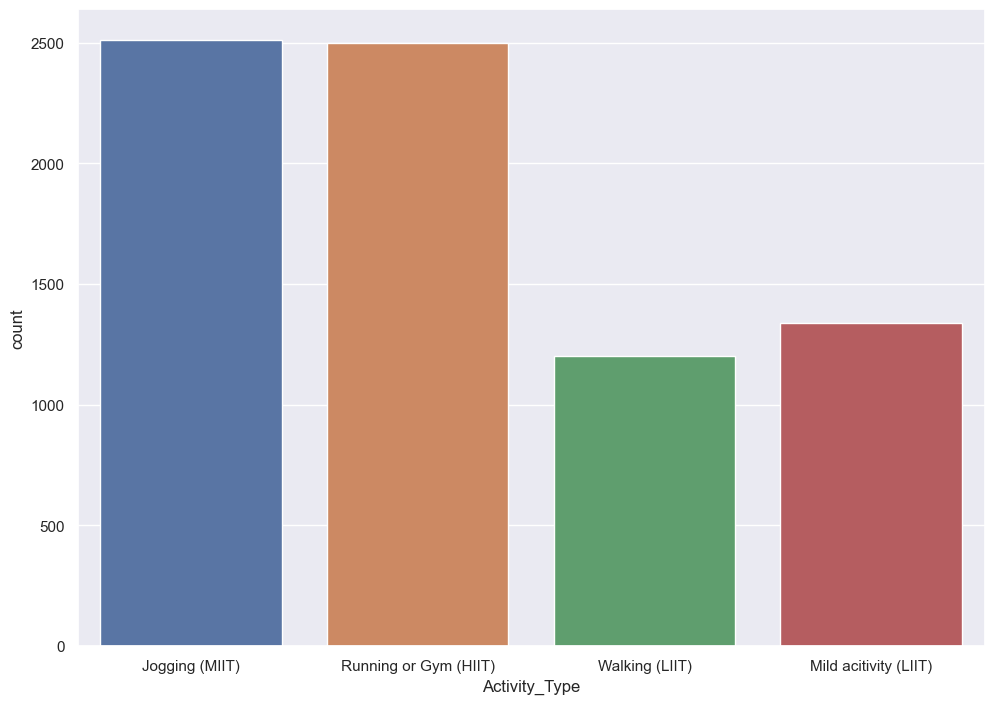

In [87]:
# Visualize Activity type 
sns.countplot(female_activities['Activity_Type'])


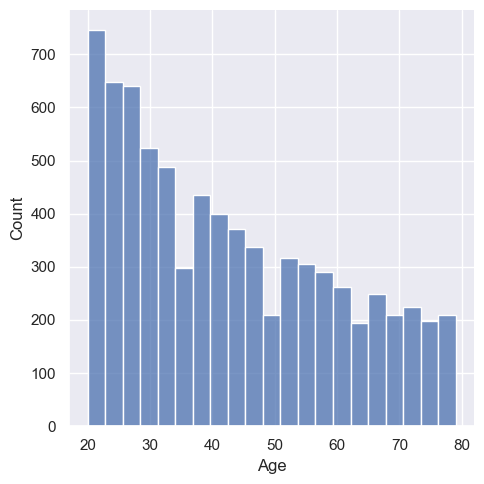

In [90]:
# Distribution plot of age
'''
    Based on the analysis more number of females on the age of 20 - 25 is highly avtive,
    25 - 45 is average and less activities for females who has age > 50
'''
sns.displot(female_activities['Age'])


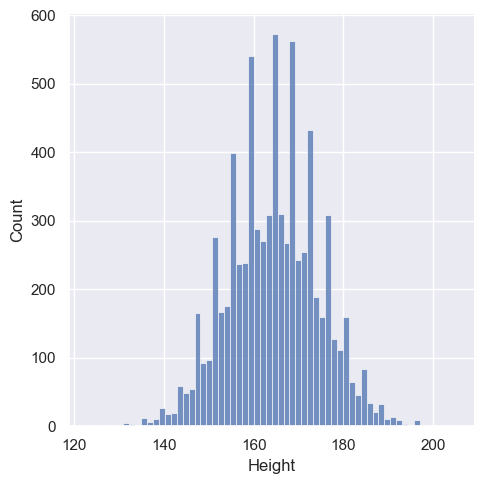

In [91]:
# Distribution plot of height
'''
    Based on the analysis it has a normal distribution where people with average height
    is more interested in workouts and activities
'''
sns.displot(female_activities['Height'])

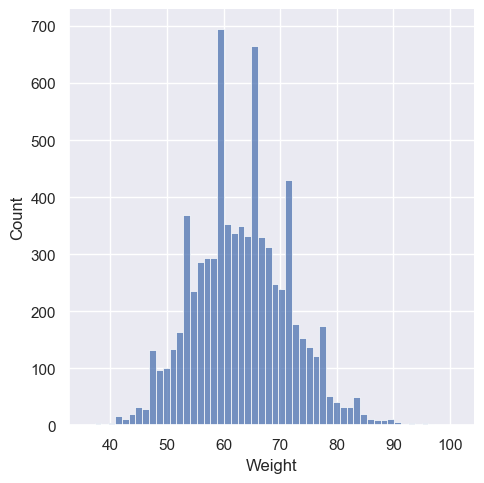

In [93]:
# Distribution plot of height
'''
    Based on the analysis it has a normal distribution where people with average weight > 50 & < 70
    is more interested in workouts and activities
'''
sns.displot(female_activities['Weight'])

<AxesSubplot:>

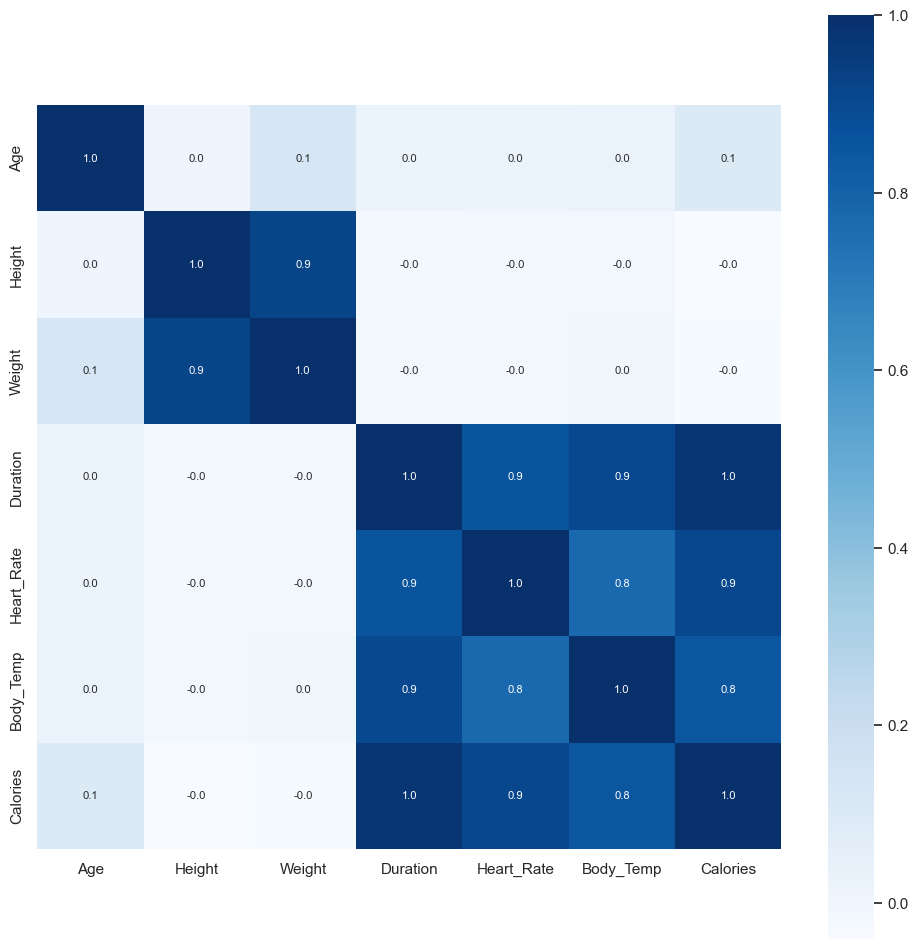

In [95]:
# Positive correlation
# Negative correlation
correlation = female_activities.corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

### Train Model

In [ ]:
# Separating features and target Evaluate the models